In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import glob
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
train_benign_df = pd.read_csv("./csv_files/train_benign_asmfile.txt")
train_benign_df.drop(train_benign_df.columns[-1], axis=1, inplace=True)
train_benign_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
train_benign_df['label'] = 0

train_malware_df = pd.read_csv("./csv_files/train_malware_asmfile.txt")
train_malware_df.drop(train_malware_df.columns[-1], axis=1, inplace=True)
train_malware_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
train_malware_df['label'] = 1

test_benign_df = pd.read_csv("./csv_files/test_benign_asmfile.txt")
test_benign_df.drop(test_benign_df.columns[-1], axis=1, inplace=True)
test_benign_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
test_benign_df['label'] = 0

test_malware_df = pd.read_csv("./csv_files/test_malware_asmfile.txt")
test_malware_df.drop(test_malware_df.columns[-1], axis=1, inplace=True)
test_malware_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
test_malware_df['label'] = 1

valid_benign = pd.read_csv("./csv_files/valid_benign_asmfile.txt")
valid_benign.drop(valid_benign.columns[-1], axis=1, inplace=True)
valid_benign.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
valid_benign['label'] = 0

valid_malware = pd.read_csv("./csv_files/valid_malware_asmfile.txt")
valid_malware.drop(valid_malware.columns[-1], axis=1, inplace=True)
valid_malware.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
valid_malware['label'] = 1


In [3]:
import sklearn
df_list = [train_benign_df, train_malware_df, test_benign_df, test_malware_df, valid_benign, valid_malware]
full_df = pd.concat(df_list, ignore_index=True, axis=0)
full_shuffled_df = sklearn.utils.shuffle(full_df)
full_shuffled_df

,ID,jmp,mov,retf,push,pop,xor,retn,nop,sub,...,ebx,ecx,edi,ebp,esp,eip,.dll,std::,:dword,label
170,9c1efe013a270e9acddbf7662cc05da2,5819,48940,0,39472,7859,4583,4353,0,1965,...,0,0,0,69,11,0,9,0,3,0
167,7c15744b8e8bf4b4fd4bc597132f892b,1613,32143,0,12355,5364,4361,2368,385,1110,...,0,0,0,0,0,0,17,0,101,0
1266,0c69aa7ec3a5bae83ee5200a9ab58c17,29,531,0,180,44,8,34,0,21,...,0,0,0,0,0,0,0,0,0,1
2010,53f1913b8bd00bb67c2c7cee939abd41,1659,21714,0,581,457,226,496,200,1311,...,0,0,0,0,0,0,2,0,180,0
2604,4bc18b1cf52e18e3754cc8cbbc809420,82,580,0,353,57,14,86,0,30,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,0f3a67c365a14fddd7a93d18ca2c6aa0,998,10986,4,8391,399,161,276,0,567,...,0,0,0,0,0,0,53,0,0,1
1070,0e60fdea4b4e9c2b7270afc22d80f227,5537,71059,0,32141,11458,5835,4620,301,3425,...,0,0,0,1,0,0,4,1918,42,1
1565,1f2d3dffcb65125d505118c736ccfcf6,871,1539,17,595,19,6,274,1,13,...,0,0,0,0,0,0,83,0,288,1
1870,3f55ea0e7cff20e8afa0f2498304a9bd,6373,42527,0,25769,7355,3254,1870,10,1394,...,0,0,0,0,0,0,7,8,76,1


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
NORMALIZE_VALID_COLUMNS = [ 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword']

full_shuffled_df[NORMALIZE_VALID_COLUMNS] = scaler.fit_transform(full_shuffled_df[NORMALIZE_VALID_COLUMNS])
full_shuffled_df[NORMALIZE_VALID_COLUMNS].astype('float')

,jmp,mov,retf,push,pop,xor,retn,nop,sub,inc,...,eax,ebx,ecx,edi,ebp,esp,eip,.dll,std::,:dword
170,0.055810,0.030357,0.000000,0.065239,0.034283,0.029353,0.050809,0.000000,0.017658,0.017800,...,0.0,0.0,0.0,0.0,0.479167,0.112245,0.0,0.026627,0.000000,0.000102
167,0.015470,0.019935,0.000000,0.020420,0.023399,0.027931,0.027640,0.016617,0.009975,0.008008,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.050296,0.000000,0.003422
1266,0.000278,0.000320,0.000000,0.000298,0.000192,0.000051,0.000397,0.000000,0.000189,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2010,0.015912,0.013464,0.000000,0.000960,0.001994,0.001447,0.005789,0.008632,0.011781,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.005917,0.000000,0.006099
2604,0.000786,0.000351,0.000000,0.000583,0.000249,0.000090,0.001004,0.000000,0.000270,0.000028,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,0.009572,0.006807,0.002863,0.013869,0.001741,0.001031,0.003222,0.000000,0.005095,0.000351,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.156805,0.000000,0.000000
1070,0.053106,0.044082,0.000000,0.053123,0.049983,0.037372,0.053925,0.012991,0.030778,0.015299,...,0.0,0.0,0.0,0.0,0.006944,0.000000,0.0,0.011834,0.092403,0.001423
1565,0.008354,0.000946,0.012169,0.000983,0.000083,0.000038,0.003198,0.000043,0.000117,0.000941,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.245562,0.000000,0.009758
1870,0.061124,0.026378,0.000000,0.042591,0.032085,0.020841,0.021827,0.000432,0.012527,0.027508,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.020710,0.000385,0.002575


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_shuffled_df[NORMALIZE_VALID_COLUMNS],full_shuffled_df['label'], stratify=full_shuffled_df['label'], test_size=0.2, random_state=42)

In [9]:
# from sklearn.decomposition import PCA

# skpca = PCA(n_components=30)
# X_pca = skpca.fit_transform(X_train)
# print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

#### RandomForestClassifier

In [10]:
features = full_shuffled_df[NORMALIZE_VALID_COLUMNS]
label = full_shuffled_df['label']

In [11]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix

model = RFC(n_estimators=100, random_state=42, 
                          oob_score = True,
                          max_depth = 16, 
                          max_features = 'sqrt')

model.fit(X_train, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=features.columns)
# X_test_pca = skpca.transform(X_test_new)

y_pred = model.predict(X_test_new)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       280
           1       0.00      0.00      0.00       279

    accuracy                           0.50       559
   macro avg       0.25      0.50      0.33       559
weighted avg       0.25      0.50      0.33       559



In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
params = { 'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80],
           'max_depth' : [14, 16, 18, 20, 22],
           'min_samples_leaf' : [2, 3, 4],
           'min_samples_split' : [1, 2, 3, 4]
            }

In [14]:
hipher_rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1, max_features = 'sqrt')
grid_cv = GridSearchCV(hipher_rf_clf, params, cv = 5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도 : {:.4f}'.format(grid_cv.best_score_))


최적 하이퍼 파라미터:  {'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}
최고 예측 정확도 : 0.9266


In [22]:
rf_best = RandomForestClassifier(n_estimators=80,
                                 max_depth=18,
                                 min_samples_leaf=2,
                                 min_samples_split=2,
                                 random_state=0,
                                 n_jobs=-1)
rf_best.fit(X_train, y_train)

pred = rf_best.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       280
           1       0.97      0.82      0.89       279

    accuracy                           0.90       559
   macro avg       0.91      0.90      0.90       559
weighted avg       0.91      0.90      0.90       559



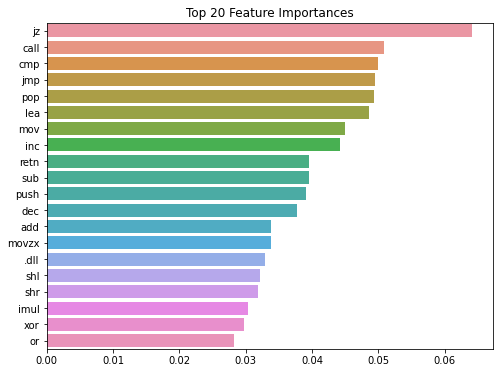

In [16]:
ftr_importances_values = rf_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()